In [1]:
%load_ext autotimebar

Label(value='0s')

In [5]:
import subprocess
subprocess.run(["python", "-m", 'gen_some_results'])

Label(value='0s')

Namespace(agents=1, agents_list=None, starts=1, starts_list=None, goals=1, goals_list=None, tasks_frequency=1, tasks_frequency_list=None, tasks=1, tasks_list=None)
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.2 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  10.00%
Running Simulation...
DEADLOCK  agent3
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.2 
	Learning: True
Path collisions:  0
Switch collisions:  0
Progress:  20.00%
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.2 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  30.00%
Running Simulation...
A

CompletedProcess(args=['python', '-m', 'gen_some_results'], returncode=0)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

with open("ResultsJsons/results_22_06_2024__20_01_03.json", "r") as f:
    results = json.load(f)

maps = results["maps"]
possible_number_of_tasks = results["tasks_num"]
possible_number_of_task_freq = results["tasks_frequency"]
possible_number_of_agents = results["agents_num"]
possible_number_of_starts = results["start_num"]
possible_number_of_goals = results["goal_num"]

Label(value='0s')

Label(value='0s')

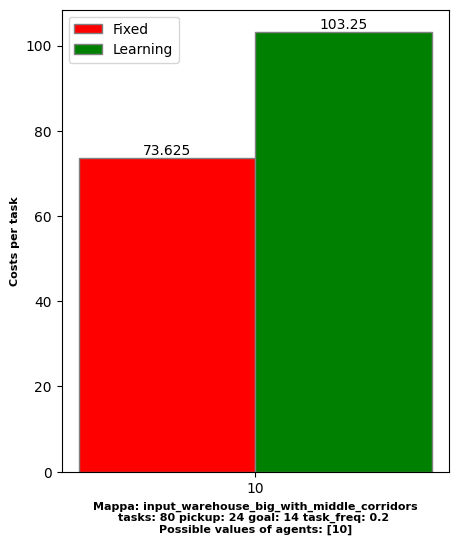

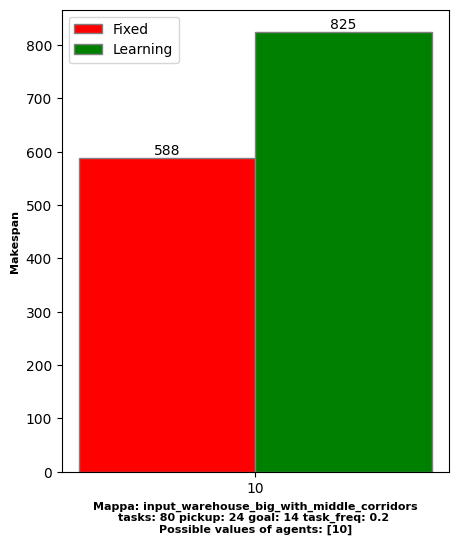

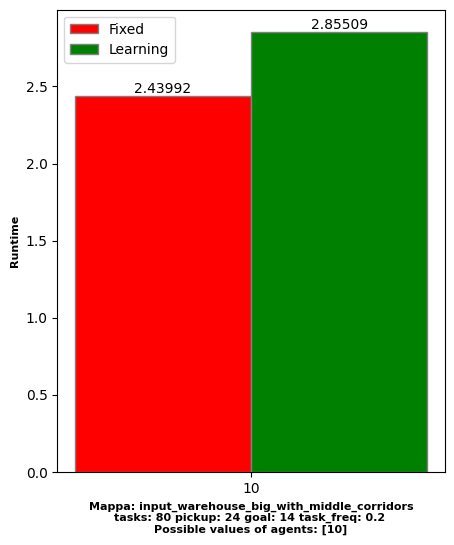

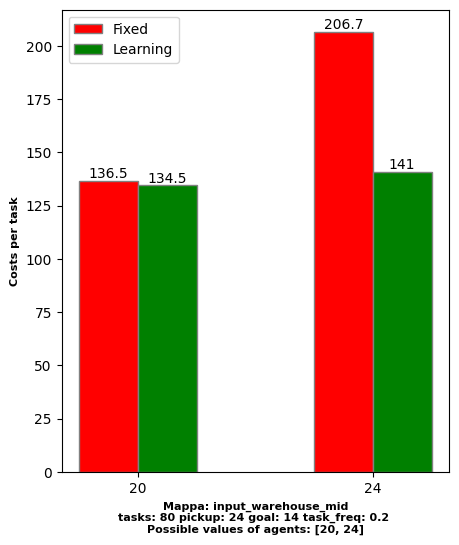

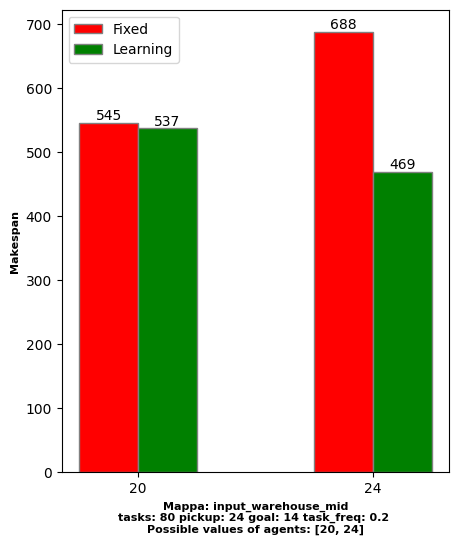

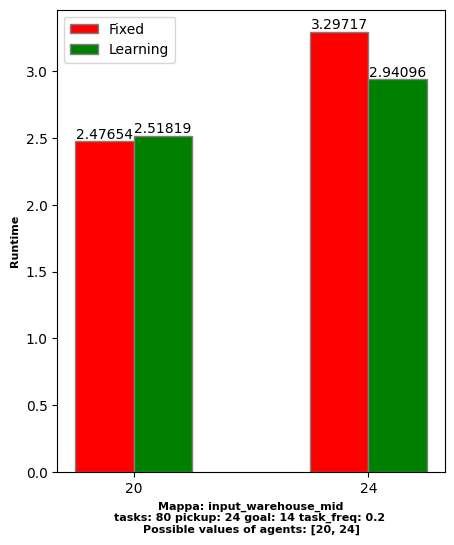

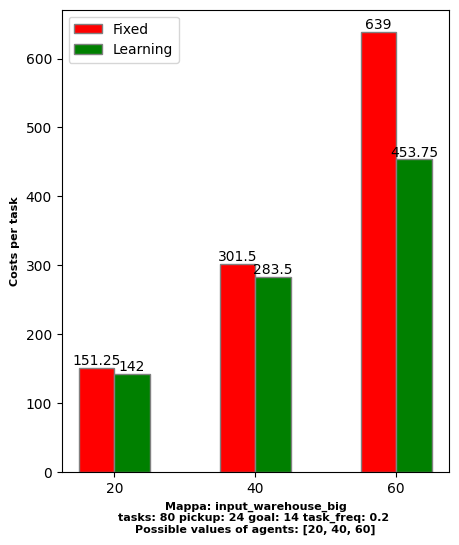

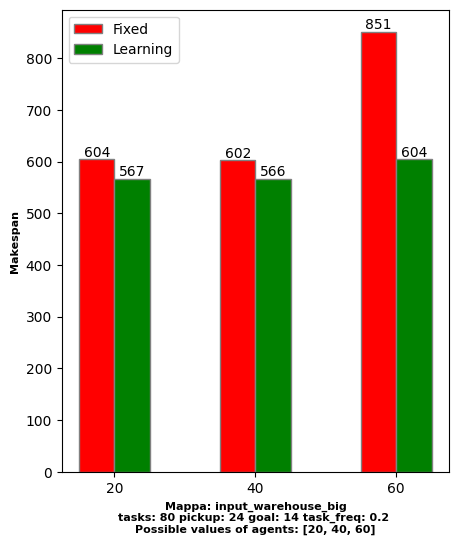

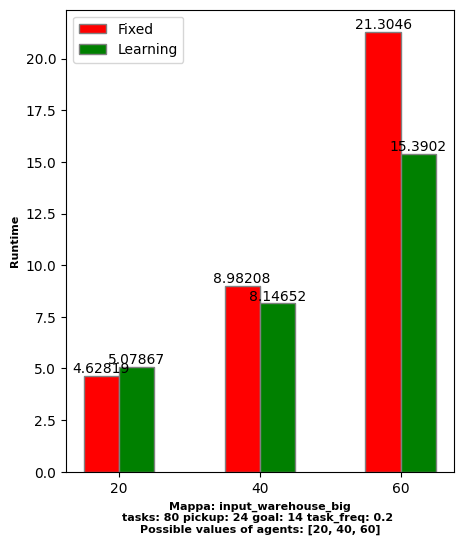

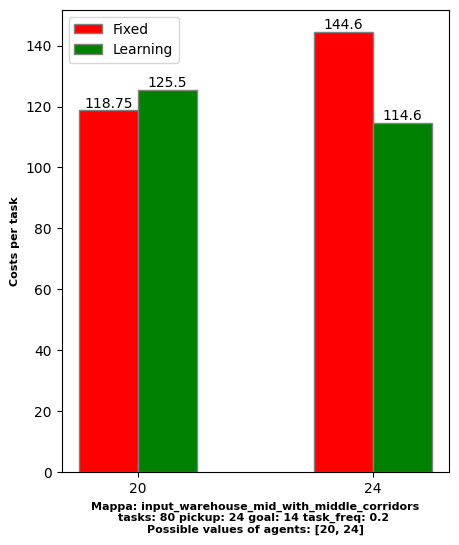

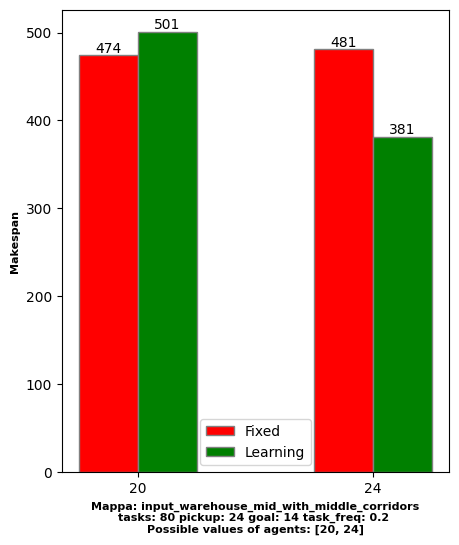

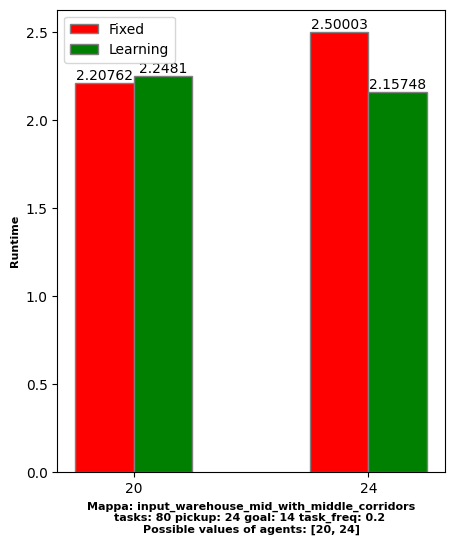

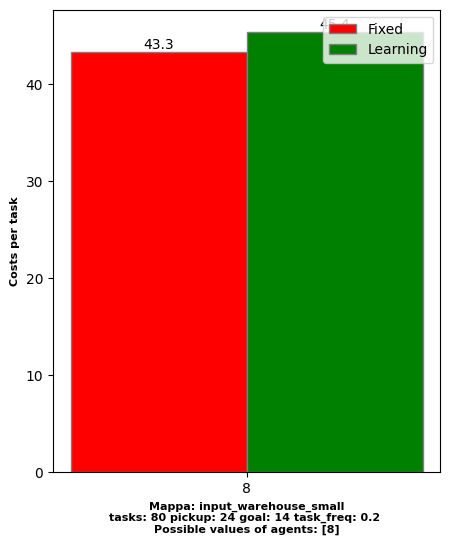

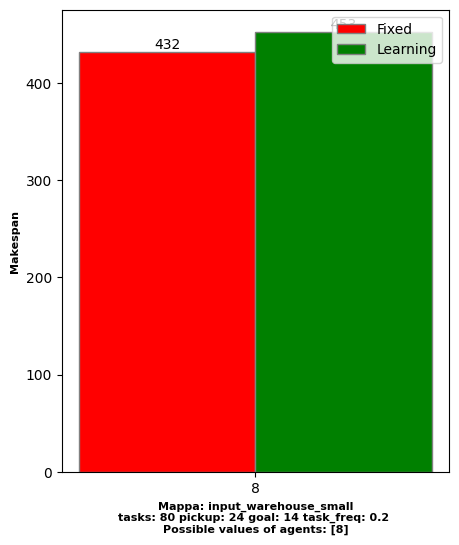

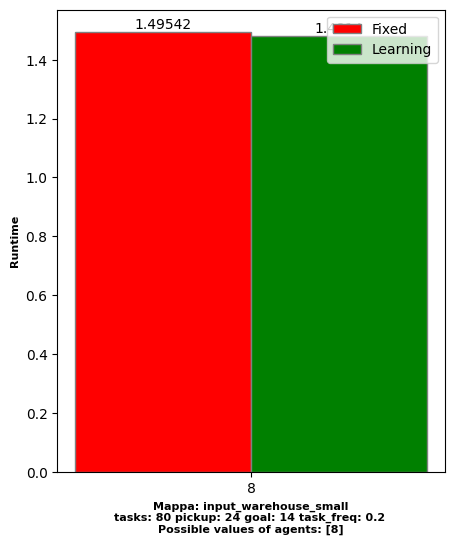

In [3]:
from stats_visualizer import StatsVisualizer

stats_visualizer = StatsVisualizer(maps, possible_number_of_agents, possible_number_of_tasks, possible_number_of_task_freq, possible_number_of_starts, possible_number_of_goals)

for my_map in stats_visualizer.get_map_names():
    stats_visualizer.show_costs(my_map)
    stats_visualizer.show_makespans(my_map)
    stats_visualizer.show_runtimes(my_map)